In [473]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


def standardize(dataframe, col):
    dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()

df = pd.read_csv("X_train.csv", error_bad_lines=False)
df = pd.concat((df, pd.read_csv("X_test.csv", error_bad_lines=False)), ignore_index=True)

df.drop(['id', 'image_width', 'image_height', 'image_url'], axis = 1, inplace = True)
print(df.describe())
print(df.columns)

       images_count          year  product_width  product_length   shoe_size  \
count  11840.000000  1.983000e+03      153.00000      131.000000  300.000000   
mean       3.654645  1.166698e+04       45.79281       67.487023   39.033333   
std        2.057843  4.311602e+05       28.43733       41.744412    2.920156   
min        0.000000  0.000000e+00       10.00000       23.000000   16.000000   
25%        2.000000  1.979000e+03       30.00000       35.000000   37.000000   
50%        3.000000  1.998000e+03       40.00000       50.000000   39.000000   
75%        5.000000  2.007000e+03       50.00000       80.000000   41.000000   
max       29.000000  1.920193e+07      180.00000      250.000000   48.000000   

       product_height        weight         price  
count      163.000000  1.183600e+04  11840.000000  
mean        63.036810  8.965613e+03     21.795489  
std         31.945389  9.095875e+04     45.683665  
min          9.000000  1.000000e-01      0.500000  
25%         45.7500

b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


0


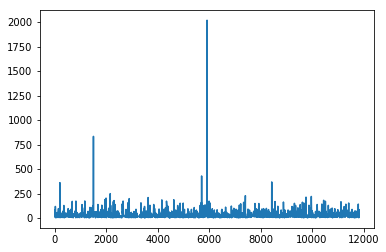

In [474]:
df.loc[df['year'] > 2019, 'year'] = 2019
df['year'].fillna(2019, inplace = True)
print(sum(df['year'].isnull()))

df['age'] = 2019 - df['year']
df.drop(['year'], axis = 1, inplace = True)
plt.plot(df[df['age'] > 0]['age'])
plt.show()

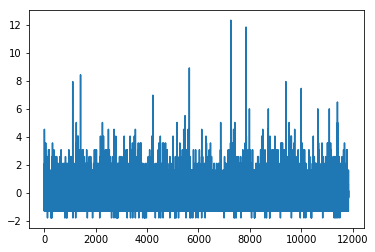

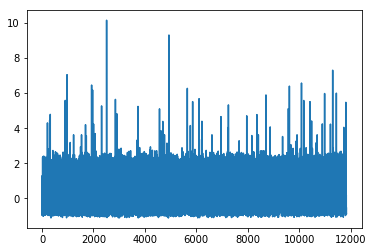

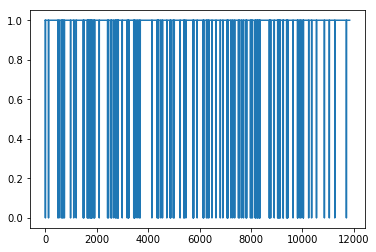

In [475]:
df['images_count'].fillna(0, inplace = True)
standardize(df, "images_count")
plt.plot(df['images_count'])
plt.show()

df['product_description'].fillna("", inplace = True)
df['desc_len'] = df['product_description'].str.len()
df.drop(['product_description'], axis = 1, inplace = True)
standardize(df, "desc_len")
plt.plot(df['desc_len'])
plt.show()

df['warranty'] = df['warranty'].isnull()
plt.plot(df['warranty'])
plt.show()

df['has_color'] = df['color'].isnull()
df.drop(['color'], axis = 1, inplace = True)

df['wifi'].fillna(False, inplace = True)


In [476]:
import unidecode
df['has_material'] = df['material'].isnull()
df['has_brand'] = df['brand'].isnull()
# df['material'].fillna("", inplace = True)
# df['material'] = df['material'].apply(unidecode.unidecode)
# df['material'] = df['material'].apply(str.strip)
# df['material'] = df['material'].apply(str.replace, args = (" ", ""))
df.drop(['material', 'brand'], axis = 1, inplace = True)

df['has_vintage'] = df['vintage'].isnull() == False
df['vintage'].fillna(False, inplace = True)


In [477]:
standardize(df, 'price')

dummies = pd.get_dummies(df['condition'], drop_first = True)
df = df.join(dummies)
df.drop(['condition'], axis = 1, inplace = True)

dummies = pd.get_dummies(df['store_name'], drop_first = True)
df = df.join(dummies)
df.drop(['store_name'], axis = 1, inplace = True)

dummies = pd.get_dummies(df['category'], drop_first = True)
df = df.join(dummies)
df.drop(['category'], axis = 1, inplace = True)


df['has_author'] = df['author'].isnull()
df['has_editor'] = df['editor'].isnull()
df['has_cat_1'] = df['sub_category_1'].isnull() == False
df['has_cat_2'] = df['sub_category_2'].isnull() == False
df['has_cat_3'] = df['sub_category_3'].isnull() == False
df['has_cat_4'] = df['sub_category_4'].isnull() == False
df.drop(['author', 'editor'], axis = 1, inplace = True)
df.drop(['sub_category_1', "sub_category_2", "sub_category_3", "sub_category_4"], axis = 1, inplace = True)
df['weight'].fillna(0, inplace = True)
standardize(df, 'weight')

df.drop(['product_name'], axis = 1, inplace = True)


In [478]:
for idx,val in enumerate(df['product_size']):
    if (str(val).isnumeric()):
        if int(val) <= 36:
            df.at[idx, 'product_size'] = "S"
        elif int(val) <= 41: 
            df.at[idx, 'product_size'] = "M"
        elif int(val) <= 44: 
            df.at[idx, 'product_size'] = "L"
        elif int(val) <= 48: 
            df.at[idx, 'product_size'] = "XL"
        elif int(val) <= 52: 
            df.at[idx, 'product_size'] = "XXL"
        else:
            df.at[idx, 'product_size'] = "XXXL"
    else:
        if val == "T0":
            df.at[idx, 'product_size'] = 'XS'
        elif val == "T1":
            df.at[idx, 'product_size'] = 'S'
        elif val == "T2":
            df.at[idx, 'product_size'] = 'M'
        elif val == "T3":
            df.at[idx, 'product_size'] = 'L'
        elif val == "T4":
            df.at[idx, 'product_size'] = 'XL'
        elif val == "T5":
            df.at[idx, 'product_size'] = 'XXL'
        elif val == "T6" or val == "T7" or val == "T8":
            df.at[idx, 'product_size'] = 'XXXL'

df['product_size'].fillna("no_size", inplace = True)

dummies = pd.get_dummies(df['product_size'])
df = df.join(dummies)
df.drop(['product_size'], axis = 1, inplace = True)



In [479]:
df['product_height'].fillna(0, inplace = True)
df['product_width'].fillna(0, inplace = True)
df['product_length'].fillna(0, inplace = True)
df['shoe_size'].fillna(0, inplace = True)

In [480]:
X_train, X_test = df[:8880], df[8880:]


In [482]:
from sklearn.model_selection import train_test_split

Y_train = pd.read_csv("y_train.csv")
Y_train.drop(['id'], axis =1, inplace =True)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)


In [496]:
classifiers = {}

from sklearn.ensemble import RandomForestClassifier
classifiers['random_forest'] = RandomForestClassifier(random_state=42, n_estimators=300)

from sklearn.linear_model import LogisticRegression
classifiers['logistic_regression'] = LogisticRegression()

from xgboost import XGBClassifier
classifiers['xgboost'] = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=1, max_depth=12)


In [497]:
#evaluation function
def accuracy(y_pred, y_true):
    false = 0
    true = 0
    for pred, truth in zip(y_pred, y_true['duration']):
        if (pred != truth):
            false += 1
        else:
            true += 1
    return true / (false + true)

# def categorize(y_data):
#     for idx, val in enumerate(y_data):
#         if val <= 10:
#             y_data[idx] = 0
#         elif val <= 60:
#             y_data[idx] = 1
#         else:
#             y_data[idx] = 2
#     return y_data
        


In [503]:
#stacking
X_train_stack = pd.DataFrame()
X_val_stack = pd.DataFrame()
for key, val in classifiers.items():
    print("Training " + key + "...")
    val.fit(X_train, Y_train['duration'])
    X_val_stack[key] = val.predict(X_val)
    Y_pred = X_val_stack[key]
    print(key + ": accuracy : " + str(accuracy(Y_pred, Y_val)))
    X_train_stack[key] = val.predict(X_train)

Training random_forest...
random_forest: accuracy : 0.5095720720720721
Training logistic_regression...
logistic_regression: accuracy : 0.4634009009009009
Training xgboost...


/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


xgboost: accuracy : 0.5033783783783784


/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [504]:
model_stack = RandomForestClassifier(random_state=42, n_estimators=300)
model_stack.fit(X_train_stack, Y_train['duration'])

Y_pred = model_stack.predict(X_val_stack)
print("stacking : accuracy : " + str(accuracy(Y_pred, Y_val)))

stacking : accuracy : 0.5095720720720721


In [506]:
X_test_stack = pd.DataFrame()
for key, val in classifiers.items():
    X_test_stack[key] = val.predict(X_test)

results = model_stack.predict(X_test_stack)

import os

if (os.path.exists('submission.txt')):
    os.remove('submission.txt')
with open('submission.txt', 'w') as file:
    file.write("id,revenue\n")
    for i, result in enumerate(results):
        line = str(i) + ',' + str(result) + '\n'
        file.write(line)
    print("Write successfull")


      random_forest  logistic_regression  xgboost
0                 0                    1        0
1                 0                    0        0
2                 0                    0        0
3                 1                    1        1
4                 2                    2        2
5                 0                    0        0
6                 0                    0        0
7                 2                    2        2
8                 0                    2        2
9                 2                    2        2
10                2                    2        2
11                0                    0        1
12                2                    0        2
13                0                    2        0
14                1                    1        1
15                0                    2        1
16                2                    2        2
17                1                    2        1
18                2                    2        2
